In [4]:
import pandas as pd

In [5]:
df= pd.read_csv('data/TAIPEI_diabetes.csv')

In [6]:
import matplotlib.pyplot as plt

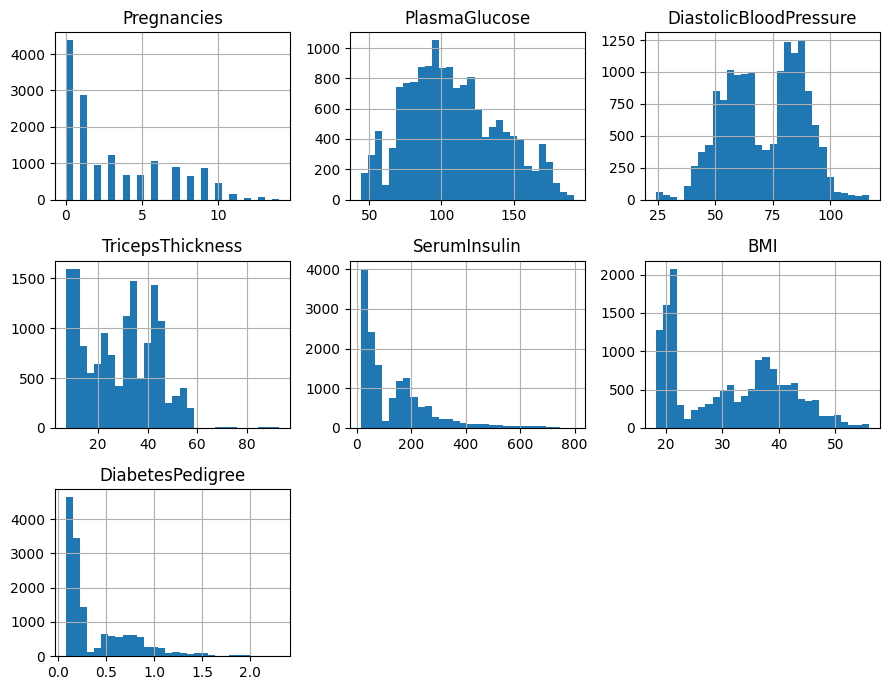

In [12]:
df1 = df.copy()
df1.drop(columns=['PatientID', 'Diabetic', 'Age']).hist(figsize=(9, 7), bins=30)
plt.tight_layout()
plt.show()

In [13]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB
None


In [14]:
print ( df.isnull().sum())

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64


In [38]:
print (df.describe())

          PatientID   Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
count  1.500000e+04  15000.000000   15000.000000            15000.000000   
mean   1.502922e+06      3.224533     107.856867               71.220667   
std    2.892534e+05      3.391020      31.981975               16.758716   
min    1.000038e+06      0.000000      44.000000               24.000000   
25%    1.252866e+06      0.000000      84.000000               58.000000   
50%    1.505508e+06      2.000000     104.000000               72.000000   
75%    1.755205e+06      6.000000     129.000000               85.000000   
max    1.999997e+06     14.000000     192.000000              117.000000   

       TricepsThickness  SerumInsulin           BMI  DiabetesPedigree  \
count      15000.000000  15000.000000  15000.000000      15000.000000   
mean          28.814000    137.852133     31.509646          0.398968   
std           14.555716    133.068252      9.759000          0.377944   
min            7.000000

In [39]:
df.duplicated().sum()

np.int64(0)

In [40]:
df_cleaned=df.copy()

In [41]:
print (df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB
None


In [42]:
print (df_cleaned.describe())

          PatientID   Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
count  1.500000e+04  15000.000000   15000.000000            15000.000000   
mean   1.502922e+06      3.224533     107.856867               71.220667   
std    2.892534e+05      3.391020      31.981975               16.758716   
min    1.000038e+06      0.000000      44.000000               24.000000   
25%    1.252866e+06      0.000000      84.000000               58.000000   
50%    1.505508e+06      2.000000     104.000000               72.000000   
75%    1.755205e+06      6.000000     129.000000               85.000000   
max    1.999997e+06     14.000000     192.000000              117.000000   

       TricepsThickness  SerumInsulin           BMI  DiabetesPedigree  \
count      15000.000000  15000.000000  15000.000000      15000.000000   
mean          28.814000    137.852133     31.509646          0.398968   
std           14.555716    133.068252      9.759000          0.377944   
min            7.000000

In [43]:
df_cleaned.columns

Index(['PatientID', 'Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age',
       'Diabetic'],
      dtype='object')

In [15]:
print(f"origin rows count: {df.shape[0]}")

def remove_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    numeric_cols = [col for col in numeric_cols if col not in ["Age", "PatientID", "Pregnancies", "Diabetic"]]
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1 * IQR
        upper_bound = Q3 + 1 * IQR
        
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        
        print(f"{col}: there are {df.shape[0]} rows after removing outliers.")
    
    return df

df_cleaned = df.copy()

df_cleaned = remove_outliers_iqr(df_cleaned)

print(f"Final rows count: {df_cleaned.shape[0]}")

origin rows count: 15000
PlasmaGlucose: there are 14683 rows after removing outliers.
DiastolicBloodPressure: there are 14539 rows after removing outliers.
TricepsThickness: there are 14473 rows after removing outliers.
SerumInsulin: there are 13453 rows after removing outliers.
BMI: there are 13453 rows after removing outliers.
DiabetesPedigree: there are 12680 rows after removing outliers.
Final rows count: 12680


In [16]:
# Remove abnormal pregnancies values
print(f"Rows count before cleaning: {df_cleaned.shape[0]}")
df_cleaned = df_cleaned[df_cleaned['Pregnancies'] <= (df_cleaned['Age'] - 18)]
print(f"Rows count after cleaning: {df_cleaned.shape[0]}")

Rows count before cleaning: 12680
Rows count after cleaning: 10471


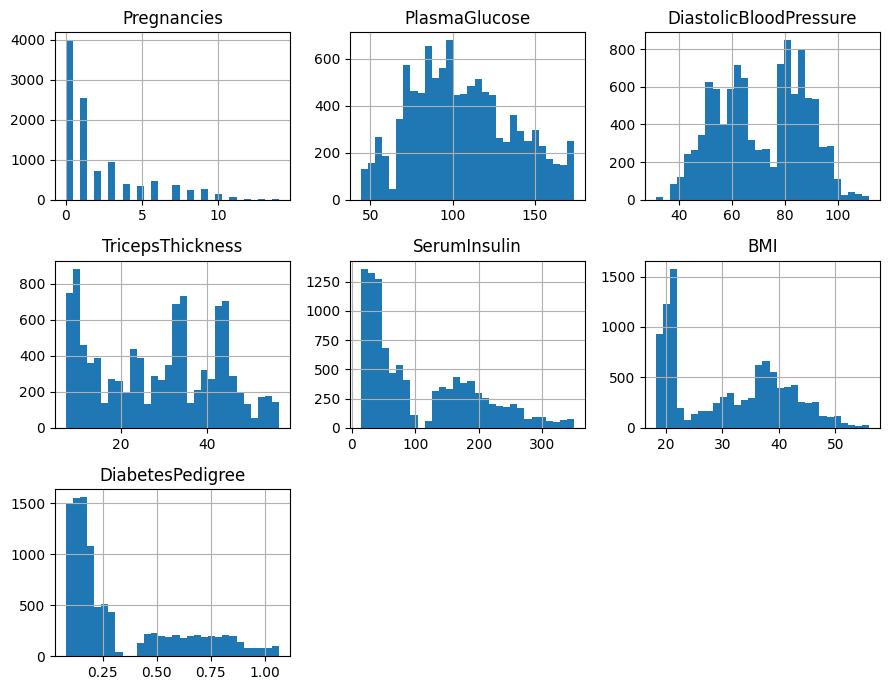

In [17]:
df2 = df_cleaned.copy()
df2.drop(columns=['PatientID', 'Diabetic', 'Age']).hist(figsize=(9, 7), bins=30)
plt.tight_layout()
plt.show()

In [46]:
df_cleaned.to_csv('data/clean_TAIPEI_diabetes.csv', index=False, columns=list(df_cleaned.columns))